In this mission, we'll focus more directly on customizing colors, line widths, layout, and annotations to improve the ability for a viewer to extract insights from the charts. We'll continue to use the same data set containing the percentage of bachelor's degrees granted to women from 1970 to 2012

We've gone ahead and read the data set into a DataFrame named women_degrees. We've also brought over the code we wrote at the end of the previous mission to generate line charts for four STEM degree categories. If it's been a while since you completed the last mission, spend some time getting familiar with the data set and the charts we generated.

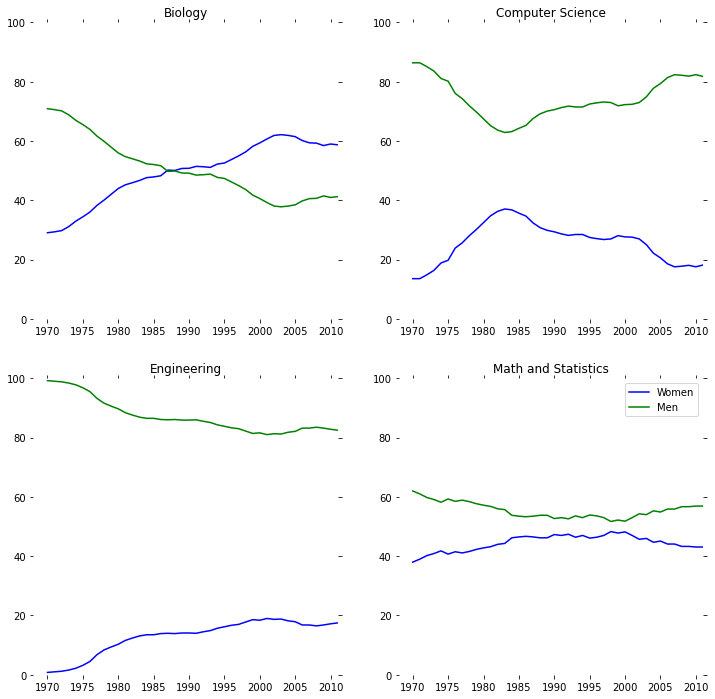

In [1]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.tick_params(bottom = False, top = False, left = False, right = False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(major_cats[sp])


# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')
plt.show()

### Color

So far, we've been using the default matplotlib colors to color the lines in line charts. When selecting colors, we need to be mindful of people who have some amount of color blindness. People who have color blindness have a decreased ability to distinguish between certain kinds of colors. The most common form of color blindness is red-green color blindness, where the person can't distinguish between red and green shades. Approximately 8% of men and 0.5% of women of Northern European descent suffer from red-green color blindness.

The Ishihara test is a well known test for color blindness, where the person is asked to identify the number in the following image:

![Image](img/ishihara.png)

People with complete color vision can observe the number 74. Some with partial color blindness see the number 21 instead and those with full color blindness can't see any number at all.

If we wanted to publish the data visualizations we create, we need to be mindful of color blindness. Thankfully, there are color palettes we can use that are friendly for people with color blindness. One of them is called Color Blind 10 and was released by Tableau, the company that makes the data visualization platform of the same name. Navigate to this page and select just the Color Blind 10 option from the list of palettes to see the ten colors included in the palette.

http://tableaufriction.blogspot.ro/2012/11/finally-you-can-use-tableau-data-colors.html

### Setting line color usin RGB

The Color Blind 10 palette contains ten colors that are colorblind friendly. Let's use the first two colors in the palette for the line colors in our charts. You'll notice that next to each color strip are three integer values, separated by periods (.):

![Image](img/palete.png)

he first color in the palette is a color that resembles dark blue and has the following RGB values:

- Red: 0
- Green: 107
- Blue: 164


To specify a line color using RGB values, we pass in a tuple of the values to the c parameter when we generate the line chart. Matplotlib expects each value to be scaled down and to range between 0 and 1 (not 0 and 255). In the following code, we scale the first color, which resembles dark blue, in the Color Blind 10 palette and set it as the line color:


```
cb_dark_blue = (0/255,107/255,164/255)
ax.plot(women_degrees['Year'], women_degrees['Biology'], label='Women', c=cb_dark_blue)
```


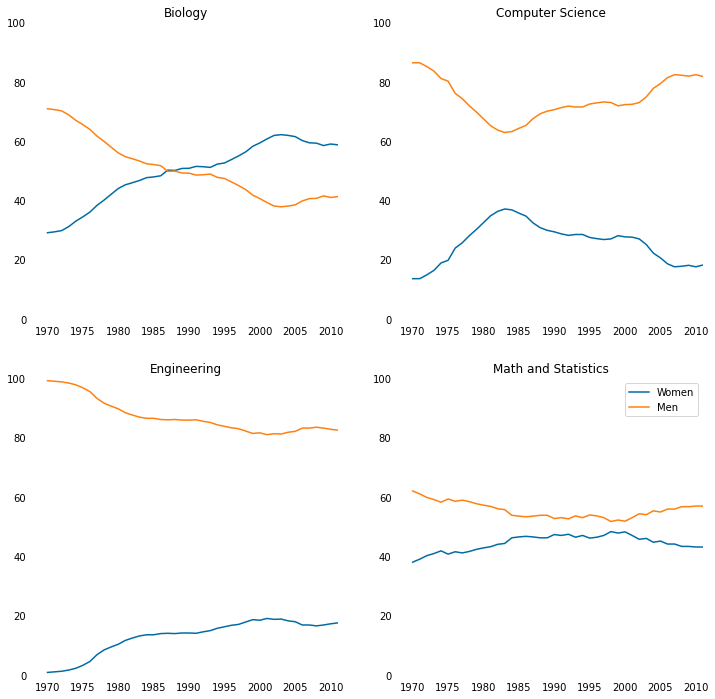

In [4]:
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # The color for each line is assigned here.
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], 
            c=(0,107/255,164/255), label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], 
            c=(1, 128/255, 14/255), label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom = False, top = False, left = False, right = False)
    
plt.legend(loc='upper right')
plt.show()

### Setting line width

By default, the actual lines reflecting the underlying data in the line charts we've been generating are quite thin. The white color in the blank area in the line charts is still a dominating color. To emphasize the lines in the plots, we can increase the width of each line. Increasing the line width also improves the data-ink ratio a little bit, because more of the chart area is used to showcase the data.

When we call the Axes.plot() method, we can use the linewidth parameter to specify the line width. Matplotlib expects a float value for this parameter:

```
ax.plot(women_degrees['Year'], women_degrees['Biology'], label='Women', c=cb_dark_blue, linewidth=2)
```

The higher the line width, the thicker each line will be.

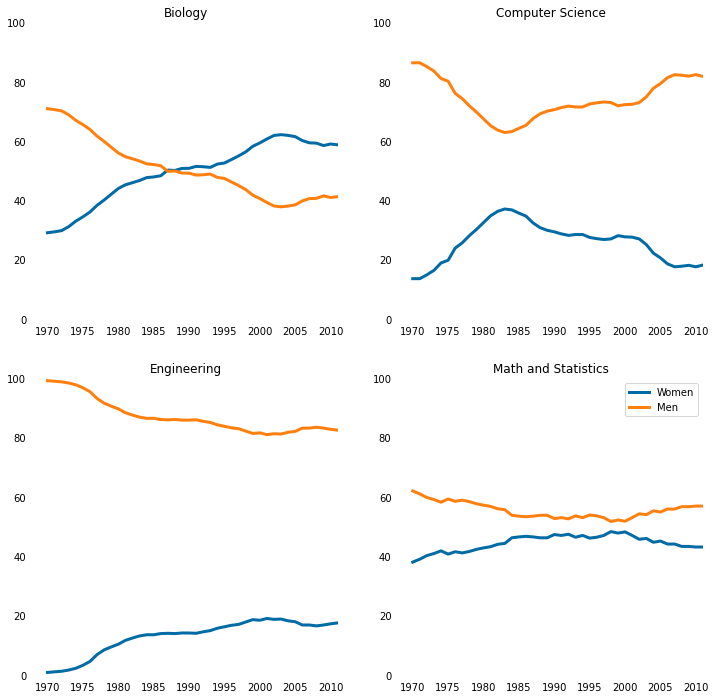

In [5]:
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # Set the line width when specifying how each line should look.
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=cb_dark_blue, label='Women', linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c=cb_orange, label='Men', linewidth = 3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom = False, top = False, left = False, right = False)

plt.legend(loc='upper right')
plt.show()

### Improve the layout and ordering

In this exercise, you'll order the charts by decreasing ending gender gap. We've populated the list stem_cats with the six STEM degree categories, ordering them by decreasing ending gender gap. In the next step, we'll explore how we can replace the legend, which is currently overlapping with the rightmost line chart.

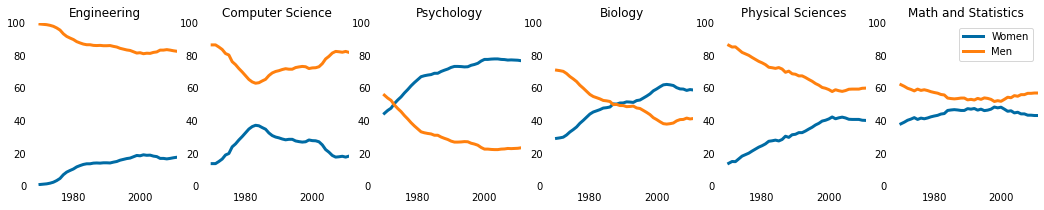

In [9]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue,
            label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange,
            label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom = False, top = False, left = False, right = False)

plt.legend(loc='upper right')
plt.show()

### Replacing the legend with annotations

The purpose of a legend is to ascribe meaning to symbols or colors in a chart. We're using it to inform the viewer of what gender corresponds to each color. Tufte encourages removing legends entirely if the same information can be conveyed in a cleaner way. Legends consist of non-data-ink and take up precious space that could be used for the visualizations themselves (data-ink).

Instead of trying to move the legend to a better location, we can replace it entirely by annotating the lines directly with the corresponding genders.


To add text annotations to a matplotlib plot, we use the Axes.text() method. This method has a few required parameters:

- x: x-axis coordinate (as a float)
- y: y-axis coordinate (as a float)
- s: the text we want in the annotation (as a string value)

The values in the coordinate grid match exactly with the data ranges for the x-axis and the y-axis. If we want to add text at the intersection of 1970 from the x-axis and 0 from the y-axis, we would pass in those values:

```
ax.text(1970, 0, "starting point")
``` 

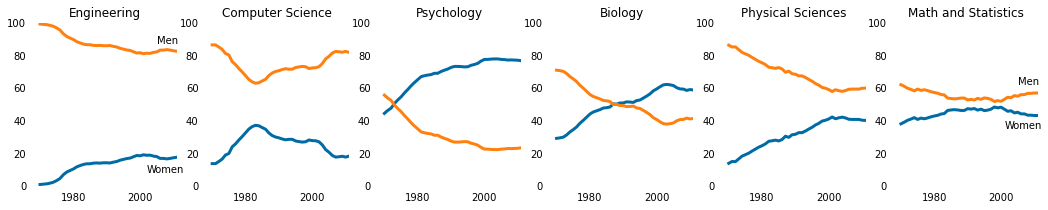

In [8]:
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
            
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom = False, top = False, left = False, right = False)
    
plt.show()